<a href="https://colab.research.google.com/github/Sapienza-AI-Lab/esercitazione6-22-23/blob/main/Exercise1.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>

## Logistic Regression Implementation
In questo esercizio implementeremo la regressione logistica da zero.

In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt
from sklearn import linear_model

### Esercizio 1 - Sigmoid Function
Iniziate implementando la funzione sigmoide, che è definita come:

$$g(z) = \frac{1}{1+e^{-z}}$$

Nel nostro caso $z = \theta^Tx$.

Non usate cicli for, ma usate le funzioni di numpy per sfruttare il calcolo vettoriale.

La funzione sigmoid, o sigmoide, è utilizzata nella logistic regression come funzione di attivazione per trasformare l'output della combinazione lineare delle features e dei pesi in un intervallo compreso tra 0 e 1. Questo è particolarmente utile poiché la logistic regression viene spesso utilizzata per problemi di classificazione binaria, dove l'obiettivo è prevedere se un'istanza appartiene alla classe 0 o 1.

La funzione sigmoid è definita come:

$$g(z) = \frac{1}{1+e^{-z}}$$


Dove \(z\) è la combinazione lineare delle features e dei pesi:

$$ z = W^TX $$

La sigmoide restituisce valori compresi tra 0 e 1, e la sua forma a "S" fa sì che l'output sia interpretato come una probabilità. In particolare, se $$(h_\theta(x))$$ è vicino a 1, ciò indica che il modello predice con alta probabilità che l'istanza appartenga alla classe positiva (1), mentre se $$(h_\theta(x))$$ è vicino a 0, indica che il modello predice con alta probabilità che l'istanza appartenga alla classe negativa (0).

L'utilizzo della sigmoid nell'equazione della logistic regression consente quindi di modellare le probabilità delle classi e di interpretare l'output come una misura di confidenza nella predizione.

In [54]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

### Esercizio 2 - Logistic Regression Cost Function
Implementate la funzione di costo per la regressione logistica, che è definita come:

$$J(\theta) = -\frac{1}{m}\sum_{i=1}^{m}y^{(i)}\log(h_\theta(x^{(i)})) + (1-y^{(i)})\log(1-h_\theta(x^{(i)}))$$

Usate la funzione sigmoide che avete implementato precedentemente e continuate a sfruttare la vettorizzazione.

In [55]:
# Logistic Regression Cost Function
def logistic_cost(W, X, Y):
    m = len(Y)

    cost = 0.0

    for i in range(m):
      h = sigmoid(np.dot(X[i], W))
      cost += Y[i] * np.log(h) + (1 - Y[i]) * np.log(1 - h)

    cost = (-1 / m) * cost  # Applica la normalizzazione

    return cost


### Esercizio 3 - Gradient Function (single step)

Ora implementate la funzione che calcola il gradiente della funzione di costo. Il gradiente è definito come:

$$\frac{\partial J(\theta)}{\partial \theta_j} = \frac{1}{m}\sum_{i=1}^{m}(h_\theta(x^{(i)}) - y^{(i)})x_j^{(i)}$$

In [56]:
# Logistic Regression Cost Gradient
def cost_gradient(W, X, Y):
    m = len(Y)

    gradient = np.zeros_like(W)

    for i in range(m):
      h = sigmoid(np.dot(X[i], W))
      gradient += (h - Y[i]) * X[i]

    gradient /= m

    return gradient




### Esercizio 4 - Prediction Function

Implementate la funzione che calcola la predizione. La predizione è definita come:

$$h_\theta(x) = \begin{cases} 1 & \text{se } g(W^Tx) \geq 0.5 \\ 0 & \text{se } g(W^Tx) < 0.5 \end{cases}$$

In [57]:
# Predict Function
def predict(W, X):
  y_pred = np.dot(X, W)
  pred = np.where(sigmoid(y_pred) > 0.5, 1, 0)
  return pred


## Admission Dataset
Usiamo l'Admission Dataset per testare le funzioni che abbiamo implementato. Il dataset contiene i risultati di due esami e la decisione di ammissione dei candidati in un'università.

In [58]:
# Load test data
!wget -O exercise1_data.txt https://raw.githubusercontent.com/Sapienza-AI-Lab/esercitazione6-22-23/main/data/exercise1_data.txt
path = 'exercise1_data.txt'
data = pd.read_csv(path, header=None, names=['Exam 1', 'Exam 2', 'Admitted'])
data.head()


--2024-01-17 09:07:25--  https://raw.githubusercontent.com/Sapienza-AI-Lab/esercitazione6-22-23/main/data/exercise1_data.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3775 (3.7K) [text/plain]
Saving to: ‘exercise1_data.txt’

exercise1_data.txt  100%[===================>]   3.69K  --.-KB/s    in 0s      

2024-01-17 09:07:25 (41.8 MB/s) - ‘exercise1_data.txt’ saved [3775/3775]



,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


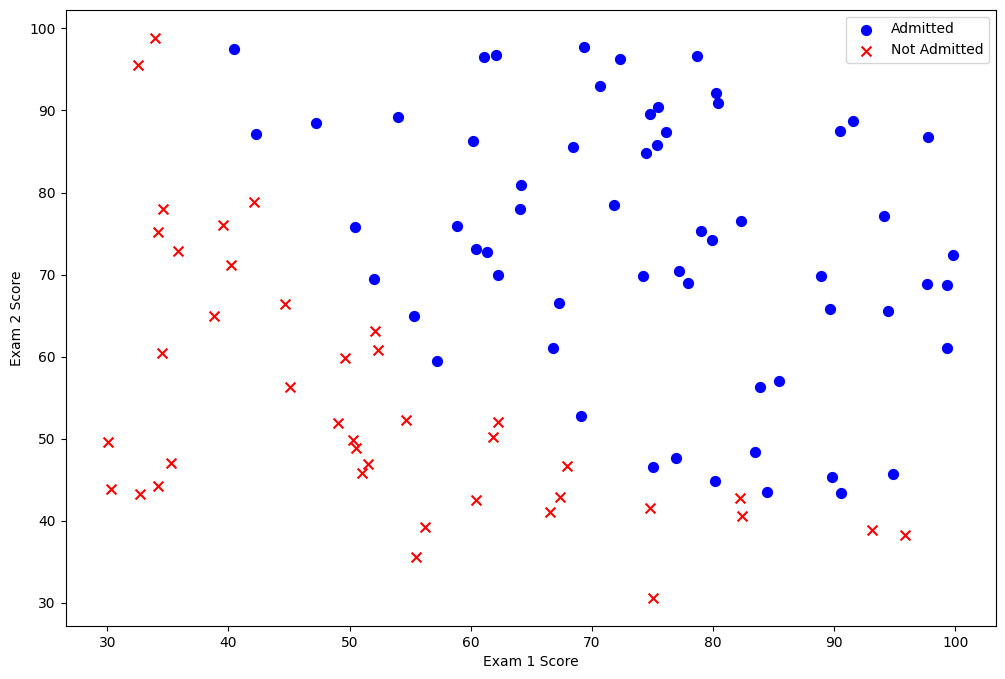

In [59]:
# Visualize data
positive = data[data['Admitted'].isin([1])]
negative = data[data['Admitted'].isin([0])]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()


In [60]:
# Set up input and output matrices
X = data[['Exam 1', 'Exam 2']].values
m, n = X.shape
X = np.concatenate((np.ones((m, 1)), X), axis=1)
n += 1
Y = np.array(data[['Admitted']])


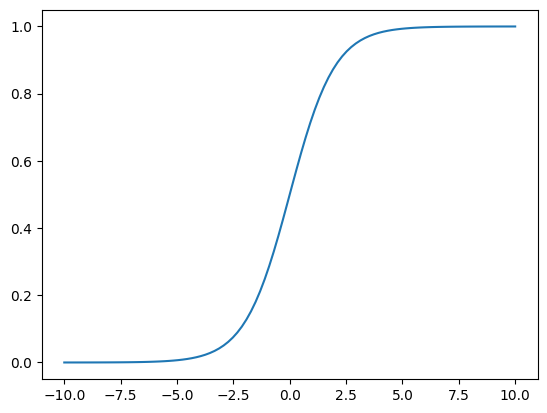

In [61]:
# Test sigmoid function
z = np.linspace(-10, 10, 100)
out = sigmoid(z)
plt.figure()
plt.plot(z, out)
plt.show()

In [62]:
# Test logistic cost function
W = np.matrix(np.ones((3, 1))*0.1)
print('Test cost function: ', logistic_cost(W, X, Y))

Test cost function:  [[4.3061355]]


In [63]:
# Test logistic regression cost gradient
result = opt.fmin_tnc(func=logistic_cost, x0=W, fprime=cost_gradient, args=(X, Y))
print('Logistic cost after optimization: ', logistic_cost(result[0], X, Y))

Logistic cost after optimization:  [0.20349773]


In [64]:
# Predict with computed weights
Y_hat = predict(result[0], X)
accuracy1 = 1.0/m * np.sum(Y_hat == Y.reshape((m,)))

print("Accuracy with our implementation: ", accuracy1)

# Test with sklearn
logreg = linear_model.LogisticRegression(penalty=None)
logreg.fit(X, Y.reshape((m,)).T)
result2 = logreg.predict(X)
accuracy2 = np.sum(result2 == Y.reshape((m,))) / m
print("Accuracy with sklearn: ", accuracy2)

# The two accuracies should be the same

Accuracy with our implementation:  0.89
Accuracy with sklearn:  0.89


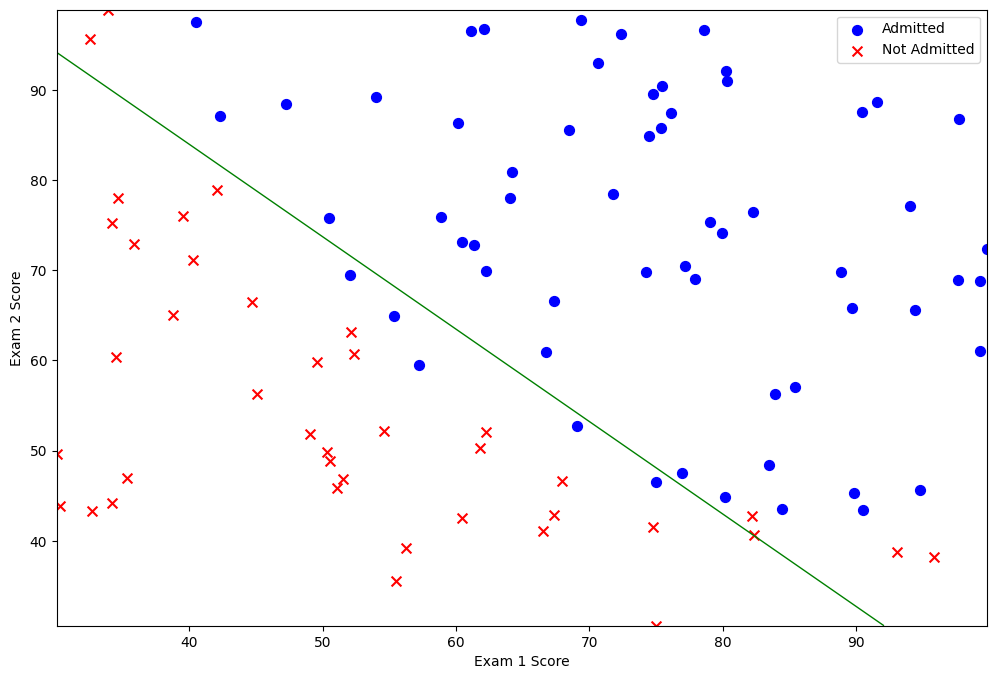

In [65]:
# Visualize decision boundary
x1_min, x1_max = X[:, 1].min(), X[:, 1].max(),
x2_min, x2_max = X[:, 2].min(), X[:, 2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0], 1)), xx1.ravel(), xx2.ravel()].dot(result[0]))
h = h.reshape(xx1.shape)
fig, ax = plt.subplots(figsize=(12,8))
ax.contour(xx1, xx2, h, [0.5], linewidths=1, colors='g')
ax.scatter(positive['Exam 1'], positive['Exam 2'], s=50, c='b', marker='o', label='Admitted')
ax.scatter(negative['Exam 1'], negative['Exam 2'], s=50, c='r', marker='x', label='Not Admitted')
ax.legend()
ax.set_xlabel('Exam 1 Score')
ax.set_ylabel('Exam 2 Score')
plt.show()

